# Palmers Penguins Analysis
An analysis of the Palmers Penguins data set for the module 23-24: 8634 -- PRINCIPLES OF DATA ANALYTICS.

## Import Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

## Load Dataset
We can use the pandas `read_csv()` function to read the dataset as a pandas dataframe from where it's hosted on GitHub as a CSV file. We'll asign it to the variable `penguins`. No other arguments are needed other than the file path. 

In [3]:
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Overview of Dataset
There are a number of functions within the pandas library that we can use to explore the dataset. 

The `display()` funciton will display the first and last five rows of our dataset, giving us information about the types of variables and the size of our dataset. 

In [4]:
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We can see that our dataset has 344 rows, some of which contain missing datapoints as evidenced by the `NaN` values in rows 3 and 339. 

Our dataset has seven columns, four of which appear to contain floats and 3 that appear to contain strings. To verify the types of data in our dataset, we can use the `.info()` method, which returns some descriptive information about a DataFrame. 

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


This confirms our inference about our data types. The object data type can be used to store mixed data, but it is generally used to store strings.  

The `.describe()` method detects numerical columns and provides some summary statistics from our dataset. 

In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Types of Variables

We've determined that our dataset has four float columns, and three object columns (which likely contain strings). Let's examine them in more detail. 



### Species

The first column in our data is the species column. We can index our DataFrame using a string to return just this column as a pandas Series. 

In [8]:
penguins["species"]

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

It appears to contain string data. From this view, we can see that it contains two unique elements, "Adelie" and "Gentoo". To view all of the unique elements in this Series, we can use the `.unique()` method. 

In [9]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

We can see that there is a third unique element, "Chinstrap". Since the species column contains three unique elements, it makes sense to use the string type to model this variable. 

An alternative type that we could use for this variable is the int type. Since ints are smaller and faster to compute, we could assign each of the three unique elements to a particular integer and convert it back at the end of our analysis. 

To test how much space we would save by converting to int type, we can use the `getsizeof()` function from the `sys` module. 

In [3]:
# Create a dictionary mapping each of the species strings to the number of bytes the string takes up. 
species_strings = {i: sys.getsizeof(i) for i in ['Adelie', 'Chinstrap', 'Gentoo']}

# Create a dictionary mapping three sample ints to the the number of bytes the int takes up. 
species_ints = {i: sys.getsizeof(i) for i in [0, 1, 2]}

print(species_strings) # Print the dictionary of string sizes. 

print(species_ints) # Print the dictionary of int sizes. 

{'Adelie': 47, 'Chinstrap': 50, 'Gentoo': 47}
{0: 28, 1: 28, 2: 28}


We can see that by using the ints 0, 1, and 2 instead of Adelie, Chinstrap and Gentoo, we would save 19, 22, and 19 bytes respectively. 

### Island

We can use the same commands to explore the island variable. 

In [10]:
penguins["island"]

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

In [11]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

From this, we can see that the island column also contains three unique elements, so it makes sense to use strings or ints to model this variable also. 

We can perform a similar test to determine the size of the variables. 

In [5]:
# Create a dictionary mapping each of the island strings to the number of bytes the string takes up. 
island_strings = {i: sys.getsizeof(i) for i in ['Torgersen', 'Biscoe', 'Dream']}

# Create a dictionary mapping three sample ints to the the number of bytes the int takes up. 
island_ints = {i: sys.getsizeof(i) for i in [0, 1, 2]}

print(island_strings) # Print the dictionary of string sizes. 

print(island_ints) # Print the dictionary of int sizes. 

{'Torgersen': 50, 'Biscoe': 47, 'Dream': 46}
{0: 28, 1: 28, 2: 28}


Again, similar memory savings could be made by converting to int type. 

### Bill Length 

Using the same commands again for the bill_length_mm variable. 

In [12]:
penguins["bill_length_mm"]

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64

In [13]:
penguins["bill_length_mm"].unique()

array([39.1, 39.5, 40.3,  nan, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8,
       41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.7, 35.9, 38.2,
       38.8, 35.3, 40.6, 40.5, 37.9, 37.2, 40.9, 36.4, 42.2, 37.6, 39.8,
       36.5, 40.8, 36. , 44.1, 37. , 39.6, 37.5, 42.3, 40.1, 35. , 34.5,
       41.4, 39. , 35.7, 41.3, 41.6, 35.5, 41.8, 33.5, 39.7, 45.8, 42.8,
       36.2, 42.1, 42.9, 35.1, 37.3, 36.3, 36.9, 38.3, 34. , 38.1, 33.1,
       43.2, 41. , 45.6, 42.7, 40.2, 35.2, 41.5, 38.5, 43.1, 36.8, 35.6,
       32.1, 40.7, 46.5, 50. , 51.3, 45.4, 52.7, 45.2, 46.1, 46.6, 51.7,
       47. , 52. , 45.9, 50.5, 50.3, 58. , 46.4, 49.2, 42.4, 48.5, 50.6,
       46.7, 49.5, 52.8, 54.2, 51. , 49.7, 47.5, 47.6, 46.9, 53.5, 49. ,
       46.2, 50.9, 45.5, 50.8, 50.1, 51.5, 49.8, 48.1, 51.4, 45.7, 50.7,
       52.2, 49.3, 50.2, 51.9, 46.8, 55.8, 43.5, 49.6, 48.7, 43.3, 48.4,
       45.1, 46.3, 44.5, 47.8, 48.2, 47.3, 59.6, 49.1, 42.6, 44.4, 44. ,
       45.3, 43.6, 44.9, 45. , 43.8, 50.4, 54.3, 47

We can see that this variable contains floating point data to a max of one decimal point, and some missing values. The float type is ideal for this variable. 

Alternatively, we could convert our data to micrometers by multiplying all of our non-null values by 1000. This would allow us to use the int data type. Let's test if this would result in any memory savings. 

In [7]:
# Create a dictionary mapping a sample of millimeter floats to the number of bytes the float takes up. 
bill_length_mm_floats = {i: sys.getsizeof(i) for i in [39.1, 39.5, 40.3]}

# Create a dictionary mapping a sample of corresponding micrometer ints to the the number of bytes the int takes up. 
bill_length_mm_ints = {i: sys.getsizeof(i) for i in [39100, 39500, 40300]}

print(bill_length_mm_floats) # Print the dictionary of string sizes. 

print(bill_length_mm_ints) # Print the dictionary of int sizes. 

{39.1: 24, 39.5: 24, 40.3: 24}
{39100: 28, 39500: 28, 40300: 28}


We can see that in this case, the millimeter floats use less memory than their corresponding micrometer ints.  

### Bill Depth

Again, using the our commands for the bill_depth_mm variable.

In [14]:
penguins["bill_depth_mm"]

0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: bill_depth_mm, Length: 344, dtype: float64

In [15]:
penguins["bill_depth_mm"].unique()

array([18.7, 17.4, 18. ,  nan, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2,
       18.9, 18.6, 17.9, 16.7, 17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8,
       17.7, 19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. ,
       16.5, 20.5, 19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3,
       14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1,
       14.3, 15.8, 13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8,
       14.9, 15.6, 14. , 14.7])

Similar to bill_length_mm, bill_depth_mm contains a mixture of floats and missing values and could be modelled as a float or converted to an int by multiplying by 1000 to convert to micrometers.

To test their sizes, we can use the same commands. 

In [8]:
# Create a dictionary mapping a sample of millimeter floats to the number of bytes the float takes up. 
bill_depth_mm_floats = {i: sys.getsizeof(i) for i in [18.7, 17.4, 18. ]}

# Create a dictionary mapping a sample of corresponding micrometer ints to the the number of bytes the int takes up. 
bill_depth_mm_ints = {i: sys.getsizeof(i) for i in [18700, 17400, 18000]}

print(bill_depth_mm_floats) # Print the dictionary of string sizes. 

print(bill_depth_mm_ints) # Print the dictionary of int sizes. 

{18.7: 24, 17.4: 24, 18.0: 24}
{18700: 28, 17400: 28, 18000: 28}


Similar to the previous example, the float type is a more efficient type to use. 

### Body Mass

Using our commands again for the body_mass_g variable. 

In [16]:
penguins["body_mass_g"]

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [17]:
penguins["body_mass_g"].unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

From this, we can see that although the body mass data is stored as a float, all of the data points are actually integers. A more efficient way to to store the data for this variable would be by using the `int` type. 

In [9]:
# Create a dictionary mapping a sample of floats to the number of bytes the float takes up. 
body_mass_g_floats = {i: sys.getsizeof(i) for i in [3750., 3800., 3250.]}

# Create a dictionary mapping a sample of numerically equivalent ints to the the number of bytes the int takes up. 
body_mass_g_ints = {i: sys.getsizeof(i) for i in [3750, 3800, 3250]}

print(body_mass_g_floats) # Print the dictionary of string sizes. 

print(body_mass_g_ints) # Print the dictionary of int sizes. 

{3750.0: 24, 3800.0: 24, 3250.0: 24}
{3750: 28, 3800: 28, 3250: 28}


Interestingly, the float type continues to be the more efficient type even when the float and int are numerically equivalent. 

### Sex

One last time, using our commands on the sex variable. 

In [20]:
penguins["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [21]:
penguins["sex"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

This shows that the non-null data points for the sex variable are only one of two different values, 'MALE' or 'FEMALE'. A more efficient way to store and operate on this variable would be to store the data as type bool. We could assign 'MALE' and 'FEMALE' to be `True` and `False` respectively (or the other way around) for the duration of our analysis, converting back to their string values when our analysis is complete. 

In [12]:
# Create a dictionary mapping a sample of floats to the number of bytes the float takes up. 
sex_strings = {i: sys.getsizeof(i) for i in ['MALE', 'FEMALE']}

# Create a dictionary mapping a sample of numerically equivalent ints to the the number of bytes the int takes up. 
sex_bools = {i: sys.getsizeof(i) for i in [True, False]}

print(sex_strings) # Print the dictionary of string sizes. 

print(sex_bools) # Print the dictionary of bool sizes. 

{'MALE': 45, 'FEMALE': 47}
{True: 28, False: 28}


Similar to ints, bools take up 28 bytes and use less memory than strings. 

## Visualise the Data

### Bar Chart

Bar charts are used to display and compare categorical or discrete data. In our dataset, we have three categorical variables (species, island, and sex) and no discrete variables. We'll use the species variable to create a bar chart. 

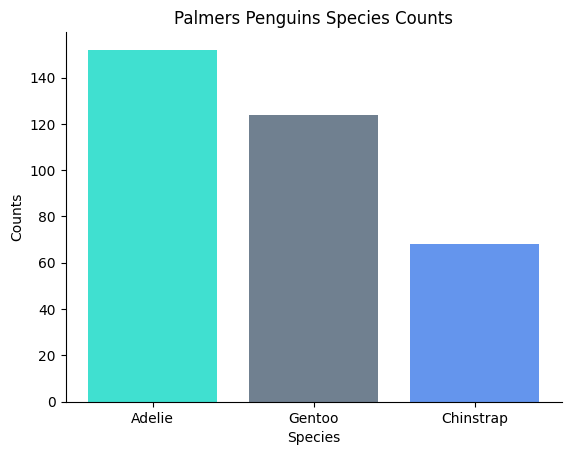

In [13]:
# Count the number of time each species occurs using the .value_counts() method. This will return a Series. 
# Use the .reset_index() method to convert to a DataFrame, renaming the column containing the counts. 
species_counts = penguins[["species"]].value_counts().reset_index(name="count")

# Create fig and ax objects. 
fig, ax = plt.subplots()

# Plot a bar chart of species counts. 
ax.bar(x = species_counts['species'], # Species names.
       height = species_counts['count'], # Species counts. 
       color = ["turquoise", "slategray", "cornflowerblue"]) # Bar colours. 

# Set the x-axis label.
ax.set_xlabel('Species')    

# Set the y-axis label.
ax.set_ylabel('Counts')

# Set the title.
ax.set_title('Palmers Penguins Species Counts')  

# Remove the top and right spines. 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Histogram

Histograms are used to display continuous data. Values are grouped into buckets, which are represented on the x-axis, and each occurance of a value in a particular bucket (range) is represented by a unit on the y-axis. 

We have four continuous variables in our data (bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g). We'll plot body_mass_g using a histogram. 

<Axes: xlabel='body_mass_g', ylabel='Count'>

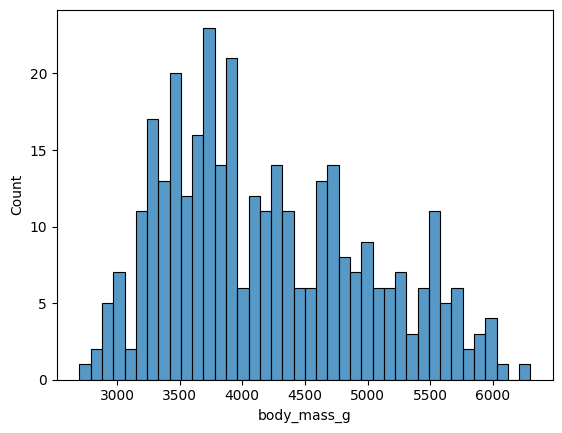

In [24]:
# Create a histogram of the body_mass_g variable using the histplot function from the seaborn library. 
# Divide it into 40 bins. 
sns.histplot(penguins['body_mass_g'], bins=40)

## Correlation

### Pearson Correlation Coefficient

There are various ways to calculate the correlation between two variables. One common way is the Pearson correlation coefficient, which measures the strength of the linear relationship between two variables. A Pearson correlation coefficient of 1 indicates a perfect linear relationship, -1 indicates a perfect negative relationship, and 0 indicates no correlation between the variables. 

We'll examine the relationship between body_mass_g and flipper_length_mm. 

To calculate the Pearson correlation coefficient, we'll first generate a correlation matrix which shows the correlation between all inputted variables. 

In [6]:
# Create a new DataFrame containing the variables we're interested in. 
# Drop any rows that contain missing values. 
corr_data = penguins[["body_mass_g", "flipper_length_mm"]].dropna()

# Use the corrcoef() function from the NumPy library to calculate a correlation matrix. 
np.corrcoef(corr_data["body_mass_g"], corr_data["flipper_length_mm"])

array([[1.        , 0.87120177],
       [0.87120177, 1.        ]])

To interpret this array, we'll consider the values from left to right, top to bottom. Respectively, they show the correlation coefficients between:
* body_mass_g and body_mass_g
* body_mass_g and flipper_length_mm
* flipper_length_mm and body_mass_g
* flipper_length_mm and flipper_length_mm

The diagonal from top left to bottom right will always contain values of 1, as this diagonal shows each variable's correlation with itself. Since we are only comparing two variables, we only have two other values in our matrix which are identical due to symmetry. 

We can see that body_mass_g and flipper_length_mm have a Pearson correlation coefficient of 0.87120177, indicating a strong positive correlation. 

### Scatterplot

Another more visual way to examine the correlation between two variables is to generate a scatter plot. Scatter plots represent each observation in a dataset as a point on a 2D graph, with x-axis representing one variable and the y-axis representing another. 

Again, we'll examine the relationship between body_mass_g and flipper_length_mm. 

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

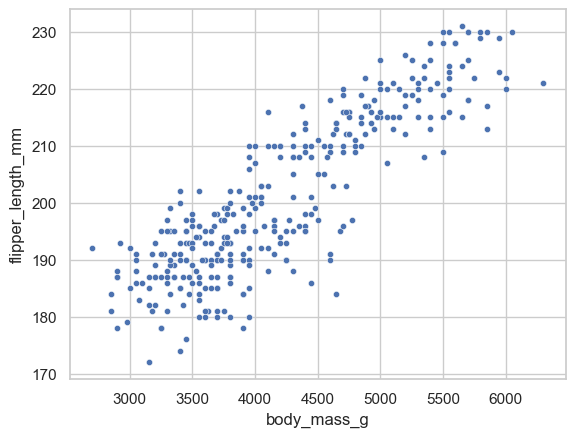

In [22]:
sns.scatterplot(x = "body_mass_g", # Assign body_mass_g to the x-axis. 
                y = "flipper_length_mm", # Assign flipper_length_mm to the y-axis. 
                data = corr_data, # Use our corr_data DataFrame which has missing values removed. 
                s = 20 # Set the point size to 20. 
                )

This graph visualises in an easy-to-grasp way the correlation between body_mass_g and flipper_length_mm. We can see that, in general, lower body mass corresponds with shorter flipper length. As one variable increases, so does the other in a relatively linear fashion. 

This linear relationship is strong, but not exact, which aligns with our earlier calculation of a correlation coefficient of 0.87120177. 

## References

* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset/
* https://stackoverflow.com/questions/48503192/pandas-what-does-object-type-really-mean
* https://pandas.pydata.org/docs/user_guide/indexing.html
* https://www.askpython.com/python/built-in-methods/variables-memory-size-in-python
    * Tutorial showing how to measure the size of a Python variable. 
* https://en.wikipedia.org/wiki/Orders_of_magnitude_(length)
    * Wikipedia article discussing various orders of magnitude. 
* https://www.w3resource.com/python-interview/explain-the-difference-between-the-int-and-float-data-types.php
* https://stackoverflow.com/questions/34113603/int-vs-float-inputs-in-python-3-and-their-utility
* https://statisticsbyjim.com/graphs/bar-charts/
    * Article by statistician Jim Frost discussing how to use and interpret bar charts.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    * Documentation on how to create a bar chart in Python using the matplotlib library.
* https://seaborn.pydata.org/generated/seaborn.histplot.html
    * Documentation on how to create a histogram in Python using the seaborn library.
* https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
    * Analysis of how to use Python to calculate various measures of correlation. 
* https://realpython.com/numpy-scipy-pandas-correlation-python/
    * Article showing how to use Python libraries NumPy, SciPy, and pandas to calculate correlation. 
* https://www.geeksforgeeks.org/exploring-correlation-in-python/
    * Python tutorial exploring how to calculate and visualise correlation. 
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html
    * Documentation on how to create a scatter plot in Python using the seaborn library.